In [1]:
!uname -a

Linux archiso 5.10.88-2-lts #1 SMP Wed, 22 Dec 2021 19:16:31 +0000 x86_64 GNU/Linux


In [1]:
# base 
import pandas as pd
import numpy as np
import dill

# data exploration
import matplotlib.pyplot as plt
import seaborn as sns
import shap
%matplotlib inline
from pylab import rcParams

rcParams['figure.figsize'] = 16, 16
# color = sns.color_palette()

# data preparation
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

# models
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, train_test_split

# metrics
from scipy import stats
from sklearn.metrics import roc_auc_score, r2_score, roc_curve, mean_absolute_error
from sklearn.inspection import permutation_importance
import shap
shap.initjs()

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


## **Get Data**

In [2]:
pd.set_option('display.max_columns', 500)

TRAIN = 'train.csv'
TEST = 'test.csv'

data = pd.read_csv(TRAIN)
test_df = pd.read_csv(TEST)

print('TRAIN shape:', data.shape)
print('TEST shape:', test_df.shape)

TRAIN shape: (30471, 292)
TEST shape: (7662, 291)


In [3]:
df = data.copy()

## **Data Exploration**

### **Data Quality**

In [7]:
df.describe().round(1)

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_c

_**Plot target distribution**_

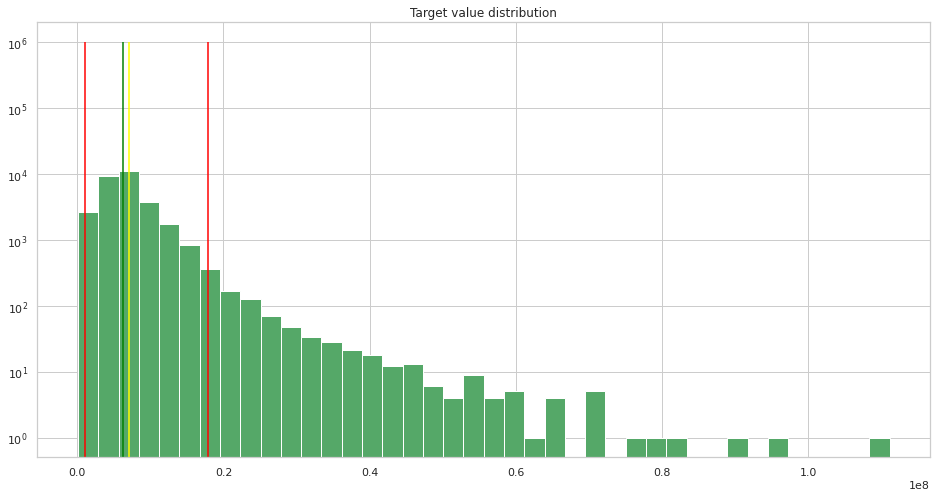

In [8]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 8))
plt.hist(df['price_doc'], color='g', bins=40, log=True);
plt.vlines(x=df.price_doc.quantile(.01), ymin=0, ymax=10e5, color='red')
plt.vlines(x=df.price_doc.quantile(.975), ymin=0, ymax=10e5,color='red')
plt.vlines(x=df.price_doc.mean(), ymin=0, ymax=10e5,color='yellow')
plt.vlines(x=df.price_doc.median(),ymin=0, ymax=10e5, color='green')

plt.title('Target value distribution');

_**Plot floor distribution**_

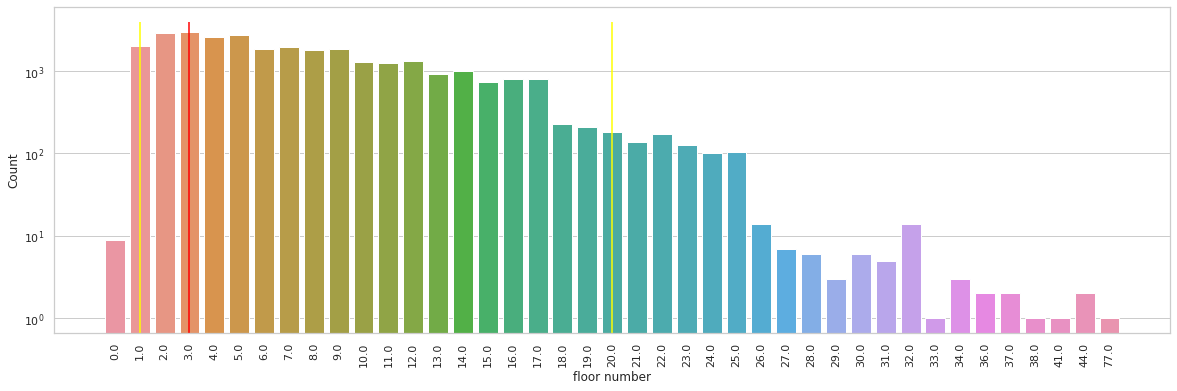

In [9]:
plt.figure(figsize=(20,6))
sns.countplot(x="floor", data=df).set_yscale('log')
plt.vlines(x=df.floor.mode(),ymin=0, ymax=4000, color='red')
plt.vlines(x=df.floor.quantile(.975),ymin=0, ymax=4000, color='yellow')
plt.vlines(x=df.floor.quantile(.01),ymin=0, ymax=4000, color='yellow')

plt.ylabel('Count', fontsize=12)
plt.xlabel('floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

_**Plot life_square distribution**_

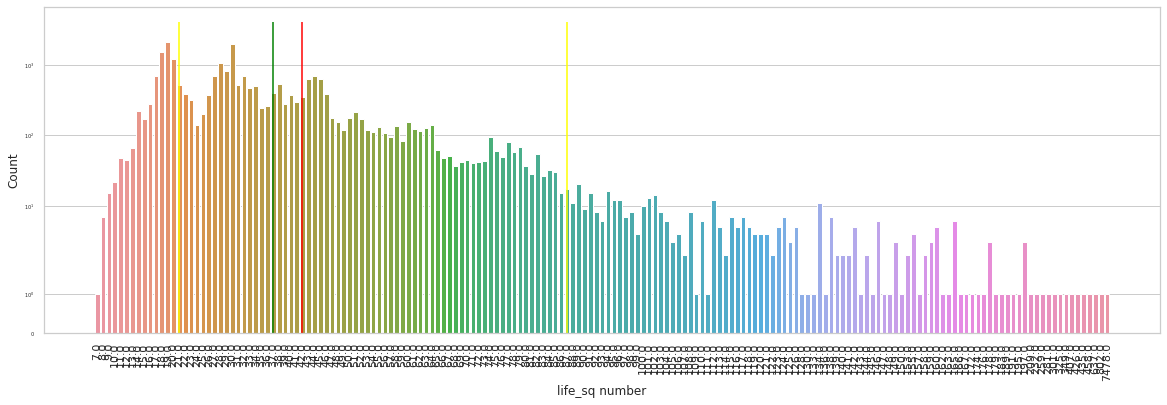

In [10]:
df_copy = df.copy()
df_copy.life_sq.replace({0.0: df.life_sq.median(), 1.0: df.life_sq.median()}, inplace=True)
plt.figure(figsize=(20,6))
sns.countplot(x="life_sq", data=df_copy).set_yscale('symlog')

plt.vlines(x=df_copy.life_sq.median(),ymin=0, ymax=4000, color='green')
plt.vlines(x=df_copy.life_sq.mean(),ymin=0, ymax=4000, color='red')

plt.vlines(x=df_copy.life_sq.quantile(.975),ymin=0, ymax=4000, color='yellow')
plt.vlines(x=df_copy.life_sq.quantile(.01),ymin=0, ymax=4000, color='yellow')

plt.ylabel('Count', fontsize=12)
plt.yticks(fontsize=5)
plt.xlabel('life_sq number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

_**Let's look at the dependence of the target variable on such characteristics as kitchen area, living area and floor**_

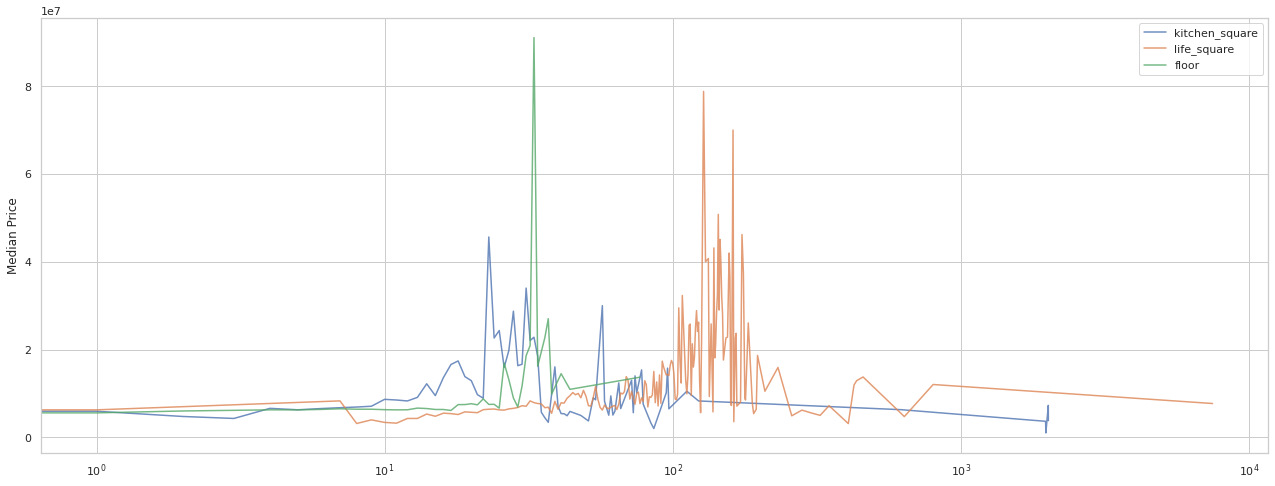

In [ ]:
grouped_kitch = df.groupby('kitch_sq')['price_doc'].aggregate(np.median).reset_index()
grouped_life = df.groupby('life_sq')['price_doc'].aggregate(np.median).reset_index()
grouped_floor = df.groupby('floor')['price_doc'].aggregate(np.median).reset_index()

f, ax = plt.subplots(1, 1, figsize=(22,8))
ax.plot(grouped_kitch.kitch_sq.values, 
              grouped_kitch.price_doc.values, 
              alpha=0.8, 
              label='kitchen_square')
ax.plot(grouped_life.life_sq.values, 
              grouped_life.price_doc.values, 
              alpha=0.8, 
              label='life_square')
ax.plot(grouped_floor.floor.values, 
              grouped_floor.price_doc.values, 
              alpha=0.8, 
              label='floor')

ax.set_xscale('log')
plt.ylabel('Median Price', fontsize=12)

plt.legend()
plt.show()

In [ ]:
# seems like this feature is not categorical - it's rating of material, ordinal value
df[df.material == 1.0].price_doc.mean(),df[df.material == 6.0].price_doc.mean()

(7088091.297105022, 7979828.4470734745)

_**Plot some dependencies**_

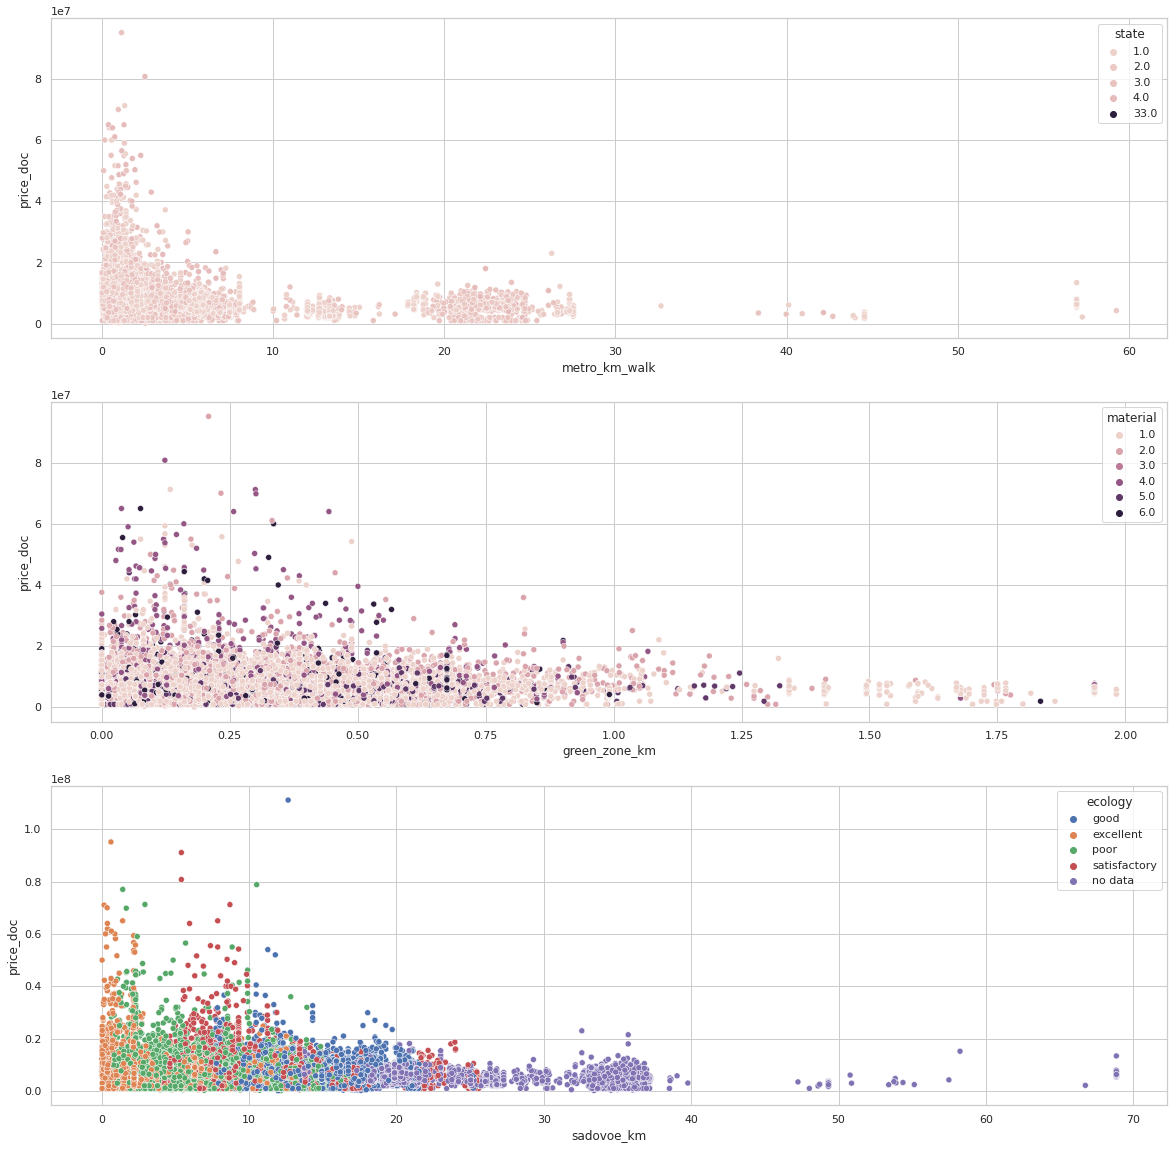

In [ ]:
f, ax = plt.subplots(3, 1, figsize=(20, 20), sharex=False)
sns.scatterplot(x=df.metro_km_walk, y=df.price_doc, data=df, hue='state', ax=ax[0]);
sns.scatterplot(x=df.green_zone_km, y=df.price_doc, data=df, hue='material', ax=ax[1]);
sns.scatterplot(x=df.sadovoe_km, y=df.price_doc, data=df, hue='ecology', ax=ax[2]);

### **Feature Types**

##### **Object Features**

In [32]:
df.select_dtypes(include='object_').head()

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,2011-08-20,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,2011-08-23,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,2011-08-27,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,2011-09-01,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
4,2011-09-05,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent


##### **Binary Features**

In [5]:
for col in df.columns:
    if df[col].nunique() == 2:
        print(col, df[col].unique())

product_type ['Investment' 'OwnerOccupier']
culture_objects_top_25 ['no' 'yes']
thermal_power_plant_raion ['no' 'yes']
incineration_raion ['no' 'yes']
oil_chemistry_raion ['no' 'yes']
radiation_raion ['no' 'yes']
railroad_terminal_raion ['no' 'yes']
big_market_raion ['no' 'yes']
nuclear_reactor_raion ['no' 'yes']
detention_facility_raion ['no' 'yes']
water_1line ['no' 'yes']
big_road1_1line ['no' 'yes']
railroad_1line ['no' 'yes']
mosque_count_500 [0 1]
mosque_count_1000 [0 1]
mosque_count_1500 [0 1]
mosque_count_2000 [0 1]


_Actual binary features contain values [no, yes]._

In [6]:
# it seems state should be a rate between 1 and 5, I'm going to fix it
df['state'] = df.state.replace({33.:5.})
df.state.unique()

array([nan,  3.,  1.,  2.,  4.,  5.])

##### **Numerical Features**

In [7]:
# ID columns
id_columns = df.loc[:, (df.columns.str.startswith('ID')| df.columns.str.startswith('id'))]
for d in id_columns:
    print(d, df[d].nunique())

id 30471
ID_metro 223
ID_railroad_station_walk 133
ID_railroad_station_avto 133
ID_big_road1 48
ID_big_road2 58
ID_railroad_terminal 8
ID_bus_terminal 14


In [8]:
print('continous features:')
df.select_dtypes(include=['float64']).shape[1]

continous features:


119

In [9]:
print('total number of numerical features:')
df.select_dtypes(include=['float64', 'int64']).shape[1]

total number of numerical features:


276

##### **Apartment Characterictics**

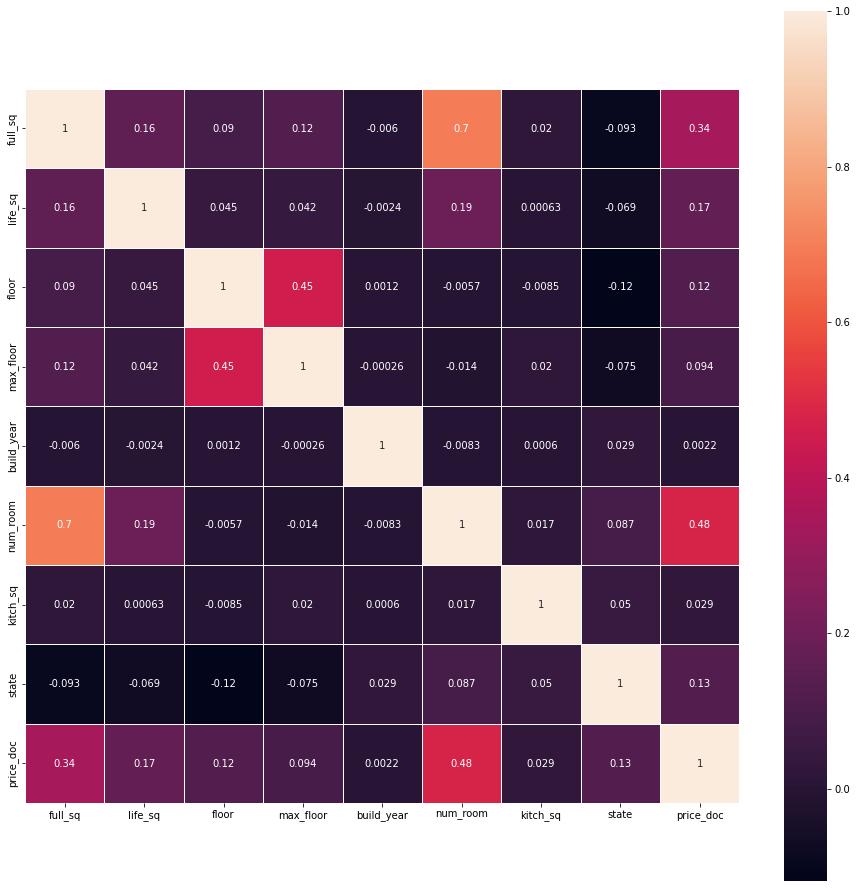

In [38]:
internal_feats = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 'kitch_sq', 'state', 'price_doc']

sns.heatmap(df[internal_feats].corr(), square=True, linewidths=.5, annot=True);

**_Plot correlation matrix of numerical features having correlation coefficient greater than 0.2_**

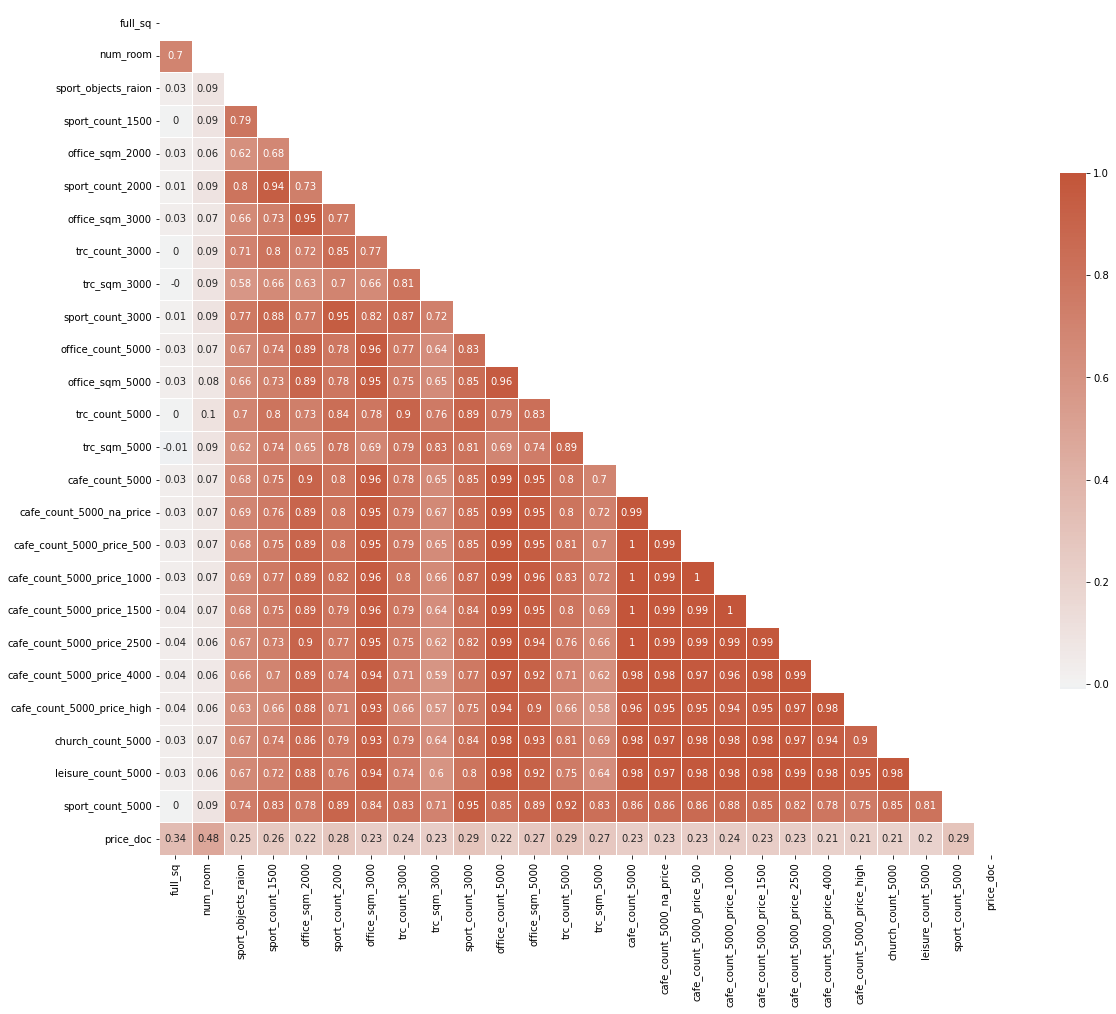

In [39]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()

corr = corr[corr.price_doc > 0.2]
cols_select = corr.index
corr = corr[cols_select].round(2)

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(19, 19))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,center=0, vmax=1, square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True);

### **Missing Values**

In [10]:
df_na = df.isna().sum()[df.isna().sum() > 0]

print("Number of features containing NaNs: {}".format(df_na.count()))
print("Total number of NaNs: {} or {}%".format(df_na.sum(), (df_na.sum()/df.size).round(3)))

Number of features containing NaNs: 51
Total number of NaNs: 261026 or 0.029%


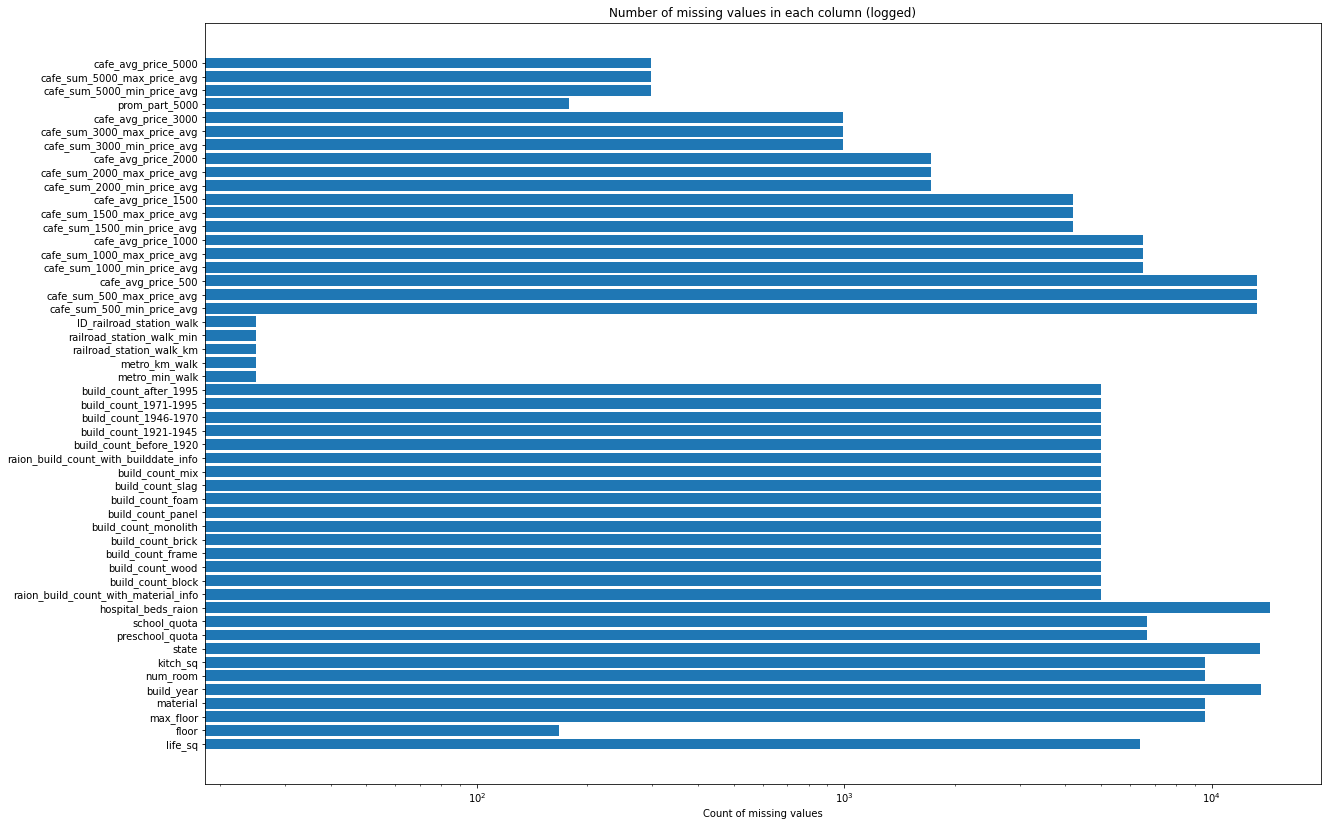

In [11]:
missing_df = df.isna().sum(axis=0).reset_index()
missing_df.columns = ['col', 'missing_count']

missing_df = missing_df[missing_df.missing_count > 0]

ind = np.arange(missing_df.shape[0])

fig, ax = plt.subplots(figsize=(20,14))
ax.barh(ind, missing_df.missing_count, log=True)
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.col.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column (logged)");

## **Feature Engineering**

In [12]:
df.drop('id', axis=1, inplace=True)
df['timestamp'] = pd.to_datetime(df.timestamp)

In [13]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
obj_cols = df.select_dtypes(include=['object']).columns.tolist()

timedata =  ['timestamp']
binary_feats = [col for col in obj_cols 
             if df[col].dropna().unique().all() in ['yes', 'no']]
id_columns = df.loc[:, (df.columns.str.startswith('ID')| df.columns.str.startswith('id'))].columns.tolist()
ordinal_feats = ['ecology']
categorical_feats = list(set(obj_cols) - set(binary_feats) - set(ordinal_feats))
numerical_feats = list(set(num_cols) - set(id_columns))


print('number of timedata features: {}'.format(len(timedata)), f'({", ".join(timedata)})')
print('number of numerical features: {}'.format(len(numerical_feats)))
print('number of categorical features: {}'.format(len(categorical_feats)), f'({", ".join(categorical_feats)})')
print('number of binary features: {}'.format(len(binary_feats)))
print('number of ordinal features: {}'.format(len(ordinal_feats)), f'({", ".join(ordinal_feats)})')
print('Total features number: {}'.format(len(df.columns)))


number of timedata features: 1 (timestamp)
number of numerical features: 268
number of categorical features: 2 (sub_area, product_type)
number of binary features: 12
number of ordinal features: 1 (ecology)
Total features number: 291


In [14]:
print('number of sub_area unique:')
df.sub_area.nunique()

number of sub_area unique:


146

### **Outliers**

In [15]:
df.area_m.clip(df.area_m.quantile(0.1), df.area_m.quantile(.975), inplace=True)

In [16]:
print('num_room stats')
print('quantile 1%: {}; quantile 97.5%: {}'.format(df.num_room.quantile(.01), 
                                                   df.floor.quantile(.975)))
print('moda: {}; median: {}; mean: {}'.format(df.num_room.mode()[0], 
                                              df.num_room.median(),
                                              df.num_room.mean()))

df['num_room'].clip(df.num_room.quantile(.05),
                    df.num_room.quantile(.975))

df.num_room.fillna(df.num_room.mode()[0], inplace=True)

num_room stats
quantile 1%: 1.0; quantile 97.5%: 20.0
moda: 2.0; median: 2.0; mean: 1.909804296856309


In [17]:
print('floor stats')
print('quantile 1%: {}; quantile 97.5%: {}'.format(df.floor.quantile(.01), 
                                                   df.floor.quantile(.975)))
print('moda: {}; median: {}; mean: {}'.format(df.floor.mode()[0], 
                                              df.floor.median(),
                                              df.floor.mean()))

df.loc[(df.floor < df.floor.quantile(.1)) | 
    (df.floor > df.floor.quantile(.99)), 'floor'] = np.NaN

df.floor.fillna(df.floor.mode()[0], inplace=True)

floor stats
quantile 1%: 1.0; quantile 97.5%: 20.0
moda: 3.0; median: 6.5; mean: 7.670802534318902


In [18]:
print('life_sq stats')
print('quantile 1%: {}; quantile 97.5%: {}'.format(df.life_sq.quantile(.01), 
                                                   df.life_sq.quantile(.975)))
print('moda: {}; median: {}; mean: {}'.format(df.life_sq.mode()[0], 
                                              df.life_sq.median(),
                                              df.life_sq.mean()))

df.loc[(df.life_sq < df.life_sq.quantile(.05)) | 
    (df.life_sq > df.life_sq.quantile(.9)), 'life_sq'] = np.NaN

df.life_sq.fillna(df.life_sq.median(), inplace=True)

life_sq stats
quantile 1%: 1.0; quantile 97.5%: 80.0
moda: 19.0; median: 30.0; mean: 34.403271338425775


In [19]:
print('kitch_sq stats')
print('quantile 1%: {}; quantile 97.5%: {}'.format(df.kitch_sq.quantile(.01), 
                                                   df.kitch_sq.quantile(.975)))
print('moda: {}; median: {}; mean: {}'.format(df.kitch_sq.mode()[0], 
                                              df.kitch_sq.median(),
                                              df.kitch_sq.mean()))

df.loc[(df.kitch_sq < df.kitch_sq.quantile(.1)) | 
    (df.kitch_sq > df.kitch_sq.quantile(.975)), 'kitch_sq'] = np.NaN

df['kitch_sq'] = df.kitch_sq.fillna(df.kitch_sq.median())

kitch_sq stats
quantile 1%: 0.0; quantile 97.5%: 13.0
moda: 1.0; median: 6.0; mean: 6.399301401980956


In [20]:
df.build_year.replace({0.0: np.NaN, 1.0: np.NaN}, inplace=True)
print('build_year stats')
print('quantile 0.01%: {}; quantile 99.9%: {}'.format(df.build_year.quantile(.01), 
                                                   df.build_year.quantile(.999)))
print('moda: {}; median: {}; mean: {}'.format(df.build_year.mode()[0], 
                                              df.build_year.median(),
                                              df.build_year.mean()))

df['build_year'] = df.build_year.clip(df.build_year.quantile(.01), 
                                      df.build_year.quantile(.999))

df.build_year.describe()

build_year stats
quantile 0.01%: 1936.0; quantile 99.9%: 2017.0
moda: 2014.0; median: 1981.0; mean: 3240.5738351703408


count    15968.000000
mean      1985.490356
std         20.471707
min       1936.000000
25%       1968.000000
50%       1981.000000
75%       2006.000000
max       2017.000000
Name: build_year, dtype: float64

In [21]:
# timedata feature engineering
df['timestamp'] = pd.to_datetime(df.timestamp)
df['transaction_year'] = df.timestamp.dt.year
df['transaction_month'] = df.timestamp.dt.month
df['transaction_day'] = df.timestamp.dt.day
df['transaction_dayofweek'] = df.timestamp.dt.dayofweek
df = df.drop('timestamp', axis=1)

In [22]:
# since it's ordinal data may be encoded with numbers
df.ecology.unique()

array(['good', 'excellent', 'poor', 'satisfactory', 'no data'],
      dtype=object)

#### **Fill NaNs**

In [23]:
# fill kitch_sq NaNs with full_sq-kitch_sq relation
kitch_ratio = df['full_sq']/df['kitch_sq']
df['kitch_sq']=df['kitch_sq'].fillna(df['full_sq'] /kitch_ratio.median())

# fill life_sq NaNs with full_sq-life_sq relation
lifesq_ratio = df['full_sq']/df['life_sq']
df['life_sq']=df['life_sq'].fillna(df['full_sq'] /lifesq_ratio.median())

# fix full_sq where it's value less than life_sq values
lifesq = df[df.full_sq < df.life_sq].life_sq
df.loc[df.full_sq < df.life_sq, 'full_sq'] = lifesq

# fill max_floor and floor NaNs
df.max_floor.fillna(df.max_floor.mode()[0], inplace=True)
df.floor.fillna(df.floor.mode()[0], inplace=True)

# fix max_floor where it's values less than floor 
mfloors = df[df.floor > df.max_floor]['floor']
df.loc[df.floor > df.max_floor, 'max_floor'] = mfloors

In [24]:
df.material.fillna(df.material.mode()[0], inplace=True)

In [34]:
# encode categorical variables
## PROBLEM: ColumnTransformer needs a certain number of features but these features have different diversity from dataset to dataset 
## OneHotEncoding
# tmp = df[categorical_feats]
# for col in categorical_feats:
#     t = pd.get_dummies(tmp[col], prefix=col)
#     tmp = pd.concat([tmp.drop(col, axis=1), t], axis=1)

# df = pd.concat([df.drop(categorical_feats, axis=1), tmp], axis=1)
# categorical_feats = tmp.columns

## LabelEncoding
le = LabelEncoder()
df['sub_area'] = le.fit_transform(df.sub_area)
df['product_type'] = le.fit_transform(df.product_type)
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [31]:
# binarize feats with values [no, yes]
for col in binary_feats:
    df[col].replace({'yes': 1, 'no': 0}, inplace=True)

# fix state ranking and fill NaNs
df['state'] = df.state.replace({33.0: 5.0})
df.state.fillna(df.state.mode()[0], inplace=True)

# encode ordinal
df['ecology'] = df['ecology'].replace({'no data': 0, 'poor': 1, 'satisfactory': 2, 'good': 3, 'excellent': 4})

# fill NaNs remaining features 
i=0
for col in df.isna().sum()[df.isna().sum()>0].index:
    df[col].fillna(df[col].median(), inplace=True)
    i+=1
    if i % 10 == 0:
        print(i, 'features proccessed')

10 features proccessed
20 features proccessed
30 features proccessed
40 features proccessed


In [32]:
# encode numerical features
scaler = MinMaxScaler()
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[numerical] = scaler.fit_transform(df[numerical])

In [33]:
# PROBLEM
# Why does ColumnTransformer give an error of mismatching between the number of features it receives 
# and those that are passed to processing. That is why I would use LabelEncoding instead of OHE
set(data.sub_area.unique()) - set(test_df.sub_area.unique())

{'Poselenie Klenovskoe'}

## **Train-test Split**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price_doc', axis=1), 
                                                    df['price_doc'], 
                                                    test_size=.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21329, 291), (9142, 291), (21329,), (9142,))

## **Build Model**

In [39]:
%%time
# try simple linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('r2_score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

r2_score: 0.4306784332179602
MAE: 0.01803961205034543
CPU times: user 2.93 s, sys: 3.01 s, total: 5.94 s
Wall time: 3.37 s


In [44]:
%%time 
# # try RandomForest regression model
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('r2_score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
df_rf = pd.DataFrame(regressor.feature_importances_)
df_rf.index = X_train.columns

# # RandomForestRegressor feature importances
df_rf.sort_values(by=0,ascending=False).head(5)
# # r2_score: 0.6365565230442768
# # MAE: 0.0127935054240103

r2_score: 0.6795829816231902
MAE: 0.012579911066988771
CPU times: user 10min 31s, sys: 896 ms, total: 10min 32s
Wall time: 10min 39s


,0
full_sq,0.395591
cafe_count_5000_price_2500,0.039814
cafe_count_3000,0.030173
cafe_count_2000,0.020418
cafe_count_3000_price_2500,0.020278


In [36]:
%%time
# try gradient boosting model

gbr = GradientBoostingRegressor(random_state=12)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print('r2_score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

df_gbr = pd.DataFrame(gbr.feature_importances_)
df_gbr.index = X_train.columns

df_gbr.sort_values(by=0,ascending=False).head(5)

r2_score: 0.6300002095401112
MAE: 0.013612740655859507
CPU times: user 2min 45s, sys: 490 ms, total: 2min 46s
Wall time: 2min 48s


,0
full_sq,0.543184
cafe_count_2000,0.047571
cafe_count_5000_price_2500,0.046497
cafe_count_3000_price_2500,0.028171
cafe_count_3000_price_1500,0.023766


In [58]:
%%time
params = {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000}


# try XGBoost regression model
xgb_regressor = XGBRegressor(**params)
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)

print('r2_score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# XGBoostRegressor feature importances
df_xgb = pd.DataFrame(xgb_regressor.feature_importances_)
df_xgb.index = X_train.columns
df_xgb.sort_values(by=0, ascending=False).head()

CPU times: user 0 ns, sys: 16 µs, total: 16 µs
Wall time: 26.5 µs


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


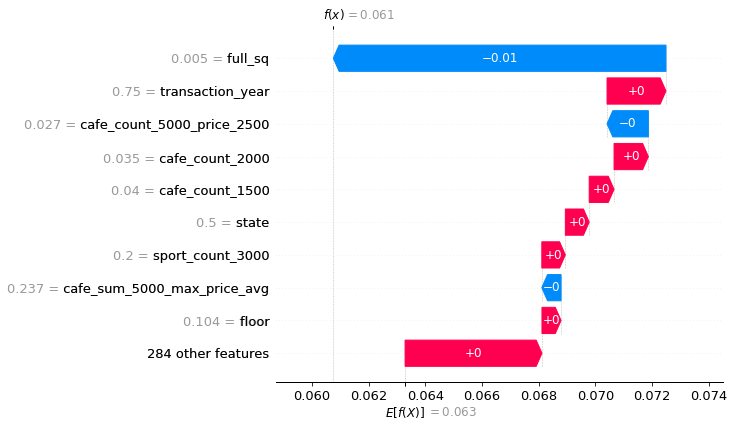

CPU times: user 2h 28min 3s, sys: 11.8 s, total: 2h 28min 14s
Wall time: 54min 9s


In [48]:
%%time
explainer = shap.TreeExplainer(xgb_regressor)
shap_values = explainer.shap_values(X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

## **Build Pipeline**

In [26]:
X_train = data.drop('price_doc', axis=1)
y_train = data['price_doc']
X_test = test_df

In [7]:
X = X_train.copy()
X['timestamp'] = pd.to_datetime(X.timestamp)
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
obj_cols = X.select_dtypes(include=['object']).columns.tolist()

binary_feats = [col for col in obj_cols 
             if X[col].dropna().unique().all() in ['yes', 'no']]
ordinal_feats = ['ecology']
timedata = ['timestamp']
timedata_after_encode = ['timestamp_year', 'timestamp_month', 'timestamp_day', 'timestamp_dayofweek']
categorical_feats = ['sub_area', 'product_type', 'material']
numerical_feats = list(set(num_cols) - set(categorical_feats) - set(['id']))
all_feats = binary_feats+ordinal_feats+timedata+categorical_feats+numerical_feats
categorical_cols_after_encode = []
for col in categorical_feats:
    new_cols = pd.get_dummies(X[col], prefix=col).columns.tolist()
    categorical_cols_after_encode += new_cols

print('INITIAL VARIABLES COUNTS:')
print(f'bin count: {len(binary_feats)}')
print(f'ord count: {len(ordinal_feats)}')
print(f'dt count: {len(timedata)}')
print(f'cat count: {len(categorical_feats)} ({", ".join(categorical_feats)})')
print(f'num count: {len(numerical_feats)}')
print(f'total: {len(binary_feats) + len(ordinal_feats) + len(timedata) + len(categorical_feats) + len(numerical_feats)}')
print(f'expected after encode:', len(binary_feats)+len(ordinal_feats)+len(timedata_after_encode)+len(categorical_feats)+len(numerical_feats))
print(f'except columns: {[col for col in data.columns.to_list() if col not in all_feats]}')

INITIAL VARIABLES COUNTS:
bin count: 12
ord count: 1
dt count: 1
cat count: 3 (sub_area, product_type, material)
num count: 273
total: 290
expected after encode: 293
except columns: ['id', 'price_doc']


In [8]:
class NumericalFeaturesCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.imputer = SimpleImputer(strategy='median')
        self.columns = []
        return None

    def fit(self, X, y=None):
        self.imputer.fit(X)
        return self

    def impute_numerical(self, X):
        kitch_ratio = X['full_sq'] / X['kitch_sq']
        X['kitch_sq'] = X['kitch_sq'].fillna(X['full_sq'] / kitch_ratio.median())
        
        lifesq_ratio = X['full_sq'] / X['life_sq']
        X['life_sq'] = X['life_sq'].fillna(X['full_sq'] / lifesq_ratio)

        # fix observations where floor feature has higher value than max_floor
        mfloors = X[X['floor'] > X['max_floor']]['floor']
        X.loc[X['floor'] > X['max_floor'], 'max_floor'] = mfloors 

        mlifesq = X[X['full_sq'] < X['life_sq']]['life_sq']
        X.loc[X['full_sq'] < X['life_sq'], 'full_sq'] = mlifesq
        return X

    def remove_outliers(self, X):
        for col in X.columns:
            if col == 'state':
                X[col] = X[col].replace({33.0: 5.0})
                
            Q1 = X[col].quantile(0.1)
            Q3 = X[col].quantile(0.975)
            IQR = Q3 - Q1

            low = Q1 - 1.5 * IQR
            high = Q3 + 1.5 * IQR

            X[col] = np.where(X[col] < low, low, X[col])
            X[col] = np.where(X[col] > high, high, X[col])

        return X
     
    def transform(self, X, y=None):
 
        X = self.impute_numerical(X)
        X = self.remove_outliers(X)
        X = self.imputer.transform(X)
        self.columns = self.imputer.feature_names_in_
        return X


class CategoricalFeaturesCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.imputer = SimpleImputer(strategy='most_frequent')
        self.encoder = OneHotEncoder(sparse=False)
        self.columns = []

    def fit(self, X, y=None):
        
        self.imputer.fit(X)
        return self
    
    def transform(self, X, y=None):
        # if X.sub_area.nunique() == 145: # look at X_train
            # X.loc[0, 'sub_area'] = 'Poselenie Klenovskoe' # fix mismatching X_train and X_test features num
        self.sub_area_unique = X.sub_area.unique()
        X.loc[0, 'sub_area'] = 'Poselenie Klenovskoe'    
        X = self.imputer.transform(X)
        X = self.encoder.fit_transform(X)
        self.columns = self.encoder.get_feature_names_out()
        return X

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.imputer = SimpleImputer(strategy='most_frequent')
        self.encoder = LabelEncoder()
    def fit(self, X, y=None):
        self.imputer.fit(X)
        return self
    def transform(self, X, y=None):
        self.columns = X.columns.tolist()
        X_transformed = self.imputer.transform(X)
        X_transformed = pd.DataFrame(dict(zip(self.columns, X_transformed.T)))
        X_transformed = X_transformed.apply(self.encoder.fit_transform)
        return X_transformed


class TimestampEncoding(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X[self.key] = pd.to_datetime(X[self.key])
        prefix = self.key
        X[f'{prefix}_year'] = X[self.key].dt.year
        X[f'{prefix}_month'] = X[self.key].dt.month
        X[f'{prefix}_day'] = X[self.key].dt.day
        X[f'{prefix}_dayofweek'] = X[self.key].dt.dayofweek
        X = X.drop(self.key, axis=1)
        self.columns = X.columns.tolist()
        return X
    

class BinaryEncoding(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.imputer = SimpleImputer(strategy='most_frequent')
        self.binary_dict = {'yes': 1, 'no': 0}
        
    
    def fit(self, X, y=None):
        self.columns = X.columns
        self.imputer.fit(X)
        return self
    
    def transform(self, X, y=None):     
        X = X.replace(self.binary_dict)
        X = self.imputer.transform(X)
        self.columns = self.imputer.feature_names_in_
        return X


class OrdinalEncoding(BaseEstimator, TransformerMixin):
    def __init__(self, ordinal_values=['no data', 'poor', 'satisfactory', 'good', 'excellent']):
        self.imputer = SimpleImputer(strategy='most_frequent')
        self.ordinal_values = ordinal_values
        self.replace_dict = dict(zip(ordinal_values, range(0, len(ordinal_values))))
        self.columns = []
    
    def fit(self, X, y=None):
        self.columns = X.columns.tolist()
        self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        X = X.replace(self.replace_dict)
        X = self.imputer.transform(X)
        self.columns = self.imputer.feature_names_in_
        return X

In [31]:
columns = timedata_after_encode+binary_feats+ordinal_feats+categorical_feats+numerical_feats
params = {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000}

tf = ColumnTransformer(transformers=[
    ('timestamp', TimestampEncoding(key='timestamp'), ['timestamp']),
    ('binary', BinaryEncoding(), binary_feats),
    ('ordinal', OrdinalEncoding(), ['ecology']),
    ('cat_cleaner', CategoricalEncoder(), categorical_feats),
    ('num_clean', NumericalFeaturesCleaner(), numerical_feats)
], remainder='drop')

scale_tf = ColumnTransformer(transformers=[
    ('scale', MinMaxScaler(), np.arange(0, len(columns)))
    ])

pipe = Pipeline(steps=[
    ('tf1', tf),
    ('scale', scale_tf),
    ('model', XGBRegressor(**params))
])


### **Fitting pipeline**

In [13]:
%%time

X_train, y_train = data.drop(['price_doc'], axis=1), data['price_doc']

pipe.fit(X_train, y_train)

CPU times: user 2h 1min 4s, sys: 28.4 s, total: 2h 1min 32s
Wall time: 50min 14s


Pipeline(steps=[('tf1',
                 ColumnTransformer(transformers=[('timestamp',
                                                  TimestampEncoding(key='timestamp'),
                                                  ['timestamp']),
                                                 ('binary', BinaryEncoding(),
                                                  ['culture_objects_top_25',
                                                   'thermal_power_plant_raion',
                                                   'incineration_raion',
                                                   'oil_chemistry_raion',
                                                   'radiation_raion',
                                                   'railroad_terminal_raion',
                                                   'big_market_raion',
                                                   'nuclear_reactor_raion',
                                                   'detention_facility_r...
        

### **Save pipeline to .dill file**

In [14]:
with open('./models/xgboost_pipeline.dill', 'wb') as f:
    dill.dump(pipe, f)

### **Setting up docker container**

In [29]:
!docker build -t sberbank-housing-market_docker_flask ./docker-flask-sberbank/

In [30]:
!docker run -d -p 4140:4140 -v /home/alina/gb_ml_for_business/machine-learning-for-business/PROJECT-Sberbank-housing-market/models/:/app/app/models sberbank-housing-market_docker_flask


## **Predict on test data**

In [15]:
import dill
dill._dill._reverse_typemap['ClassType'] = type

with open('models/xgboost_pipeline.dill', 'rb') as f:
    pipe = dill.load(f)

In [16]:
import urllib.request
import json    
from urllib.error import HTTPError


class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)


def get_features_json(observation):
    features_dict = observation.to_json()
    return features_dict


def get_predictions(body: dict):
    myurl = "http://0.0.0.0:4140/predict"
    jsondata = json.dumps(body, cls=NpEncoder)
    byte_jsondata = jsondata.encode('utf-8')
    headers = {'Content-Type': 'application/json; charset=utf-8',
               'Content-Length': len(byte_jsondata),
               'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Safari/537.36'}
    req = urllib.request.Request(myurl, headers=headers)
    try:
        response = urllib.request.urlopen(req, byte_jsondata)
        return json.loads(response.read())['predictions']
    except Exception as e:
        print(e.read())
        return str(e)

In [23]:
to_predict = test_df.head(1)

# get_features_dict
features_dict = get_features_json(to_predict)
print('features(to_predict):', to_predict.shape[1])
get_predictions(features_dict)

features(to_predict): 291


[5665759.0]

In [27]:
# kaggle
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

submission = pd.Series(y_pred)
submission.index= X_test['id']
submission.columns = ['price_doc']
submission.to_csv('submission-gb-001-le.csv')

In [28]:
pd.read_csv('submission-gb-001-le.csv').head()

,id,0
0,30474,5729424.5
1,30475,8681444.0
2,30476,5863096.5
3,30477,6589615.5
4,30478,5385630.5
